In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

df = pd.read_csv('auto-mpg.csv',header=1)

df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df['horsepower'].replace('?',np.nan,inplace=True)       
df.dropna(subset=['horsepower'],axis=0,inplace=True)    
df['horsepower'] = df['horsepower'].astype('float')    

ndf = df[['mpg','cylinders', 'horsepower', 'weight']]

X=ndf[['weight']]   # 독립 변수 X
Y=ndf[['mpg']]      # 종속 변수 Y

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (273, 1)
test data 개수:  (118, 1)


In [13]:
from sklearn.linear_model import LinearRegression       # 선형회귀분석
from sklearn.preprocessing import PolynomialFeatures    # 다항식변환

# 다항식 변환
poly = PolynomialFeatures(degree=2)     # 2차항 적용
X_train_poly = poly.fit_transform(X_train)  # X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터', X_train_poly.shape)

원 데이터:  (273, 1)
2차항 변환 데이터 (273, 3)


In [16]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly,Y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 계산
X_test_poly = poly.fit_transform(X_test)        # X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,Y_test)
print(r_square)

0.7337822241594429


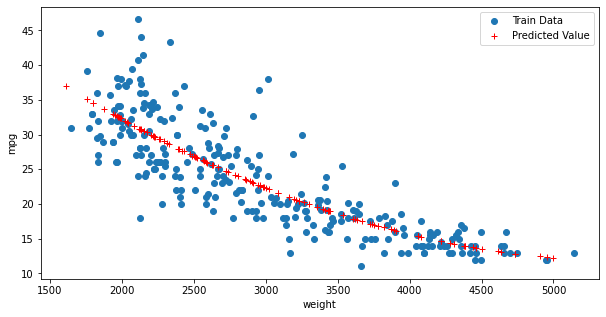

In [17]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
Y_hat_test = pr.predict(X_test_poly)

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.plot(X_train,Y_train,'o',label='Train Data')
ax.plot(X_test,Y_hat_test,'r+',label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


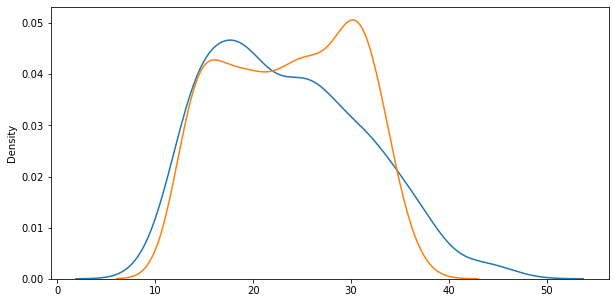

In [19]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 Y_hat을 실제 값 Y와 비교

X_poly = poly.fit_transform(X)
Y_hat = pr.predict(X_poly)

plt.figure(figsize = (10,5))
ax1 = sns.distplot(Y, hist = False, label = 'Y')
ax2 = sns.distplot(Y_hat, hist = False, label = 'Y_hat', ax = ax1)
plt.show()
plt.close()